# Homework Assignment 3  
# Regression models

# <p style="text-align: right;"> &#9989; sukaina alkhalidy.</p>
# <p style="text-align: right;"> &#9989;sukaina13.</p>

# Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression

**This assignment is due by 11:59 pm on Friday, March 29th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 80 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.


---
# Part 1: Git Branch (6 points)

For this assignment, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s24-turnin` **local** repository and create a new directory called `hw-03`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will also be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> git clone https://github.com/sukaina13/CMSE202-f23-turnin.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.


---
# Part 2: Loading the datasets (11 points)

In Parts 2-4, you will be working with the world happiness report datasets that are available at https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors.

Note that while Parts 3 and 4 are designed to be workable independent of each other, you'll definitely want to finish Part 2 before attempting Parts 3 or 4. To get started on Part 2, **you'll need to download the following files**:

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2022.csv`

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2023.csv`

&#9989; **Question 2.1 (2 points)**: **Do this:** Save the above two CSV files in the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the files.** If you did not use a command line tool to download the files, write down the command(s) that *would* have downloaded the files.

``` bash
# Put the (two) commands you used to download the two files here.
```
curl -O https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2022.csv
curl -O https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/WHR_2023.csv

&#9989;  **Question 2.2 (4 points)**: Next, load the data in both files into different Pandas DataFrames and display the first and last 5 rows for each frame. 

In [2]:
# Put your code here
import pandas as pd
# columnsnames = [
#     "country",
#     "region",
#     "happiness_score",
#     "gdp_per_capita",
#     "social_support",
#     "healthy_life_expectancy",
#     "freedom_tomakelifechoices",
#     "generosity",
#     "perceptions_of_corruption",]

happiness2022 = pd.read_csv('WHR_2022.csv', header=0)
happiness2022.head()


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,Western Europe,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,Western Europe,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,Western Europe,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,Western Europe,7.415,1.945,1.206,0.787,0.651,0.271,0.419


In [3]:
happiness2022.tail()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
141,Botswana,Sub-Saharan Africa,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,Rwanda,Sub-Saharan Africa,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,Sub-Saharan Africa,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,Middle East and North Africa,2.955,1.392,0.498,0.631,0.103,0.082,0.034
145,Afghanistan,South Asia,2.404,0.758,0.000,0.289,0.000,0.089,0.005


In [4]:
happiness2023 = pd.read_csv('WHR_2023.csv', header=0)
happiness2023.head()


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [5]:
happiness2023.tail()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027
136,Afghanistan,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059


&#9989;  **Question 2.3 (2 points)**: Do you notice any entries in the datasets are empty or have have `NaN` values. Drop these rows from the dataframes.

In [6]:
import numpy as np
# type ipython then enter it will open window and go up to see code
#my_array = np.array(['happiness2022', np.nan])
check_NaN_happiness2022=happiness2022.isna().any().any()#thier is NAN
if check_NaN_happiness2022 :
    print('csv data contains NaN values')
else :
    print('Does not contain NaN')

Does not contain NaN


In [7]:
check_NaN_happiness2023=happiness2023.isna().any().any()#thier is NAN
if check_NaN_happiness2023 :
   print('csv data contains NaN values')
else :
    print('Does not contain NaN')


csv data contains NaN values


In [8]:
# Put your code here
happiness2023.dropna(inplace=True)
happiness2023

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [9]:
 newcheck_NaN_happiness2023=happiness2023.isna().any().any()#thier is NAN
if newcheck_NaN_happiness2023 :
   print('csv data contains NaN values')
else :
    print('Does not contain NaN')

Does not contain NaN


&#9989;  **Question 2.4 (3 points)**: Lets do a bit of data analysis with the pandas frames. Display the countries with the top 3% scores (round the number of countries above to an integer) in the `happiness_score` column for 2022 and 2023. Are the countries different between the years?

In [10]:
# Put your code here
percentile_2022 = happiness2022['happiness_score'].quantile(0.97)#top 3 score percentile

top22 = happiness2022[happiness2022.happiness_score > percentile_2022]
top22

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,Western Europe,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,Western Europe,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,Western Europe,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,Western Europe,7.415,1.945,1.206,0.787,0.651,0.271,0.419


In [11]:
percentile_2023 = happiness2023['happiness_score'].quantile(0.97)#top 3 score percentile

top23 = happiness2023[happiness2023.happiness_score > percentile_2023]
top23

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


<font size=6 color="#009600">&#9998;</font> 
Finland, Denmark, Iceland, and the Netherlands remain the same, but Switzerland dropped from the top 3% in 2022, and Israel taking place.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
# Part 3: One Variable Linear Regression (30 points)

In this part, we'll perform some one-variable linear regression analysis on the world happiness data.

&#9989;  **Question 3.1 (6 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict the `happiness_score` using the `healthy_life_expectancy` column separately for 2022 and 2023 and **display the results summaries** for both years. Remember that you may need to use the `add_constant()` method to make sure `OLS` fits a general line $y = ax+b$ to the data instead of a line through the origin $y = ax$. 

In [12]:
import statsmodels.api as sm

x_2022 = happiness2022['healthy_life_expectancy']  
y = happiness2022['happiness_score'] 

x_2022 = sm.add_constant(x_2022)

model_2022 = sm.OLS(y, x_2022).fit()

print("Linear Regression Summary for happiness 2022")
print(model_2022.summary())

Linear Regression Summary for happiness 2022
                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     174.6
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.32e-26
Time:                        19:42:22   Log-Likelihood:                -160.86
No. Observations:                 146   AIC:                             325.7
Df Residuals:                     144   BIC:                             331.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [13]:
# Linear regression for 2023
x_2023 = happiness2023['healthy_life_expectancy']  
y = happiness2023['happiness_score']  

x_2023 = sm.add_constant(x_2023)

model_2023 = sm.OLS(y, x_2023).fit()

print("Linear Regression Summary for happiness 2023")
print(model_2023.summary())


Linear Regression Summary for happiness 2023
                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     168.9
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.71e-25
Time:                        19:42:22   Log-Likelihood:                -155.18
No. Observations:                 136   AIC:                             314.4
Df Residuals:                     134   BIC:                             320.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

&#9989;  **Question 3.2 (6 points)**: Answer the following questions: 

1. What were the equations of the best fit lines for 2022 and 2023? 

2. Are the slopes and intercepts of the two fitted lines identical (between the 2 years)? Would you use the 2022 model to predict for 2023?

3. Based on the R-squared values for the two cases, how do you think the models fit the data?

<font size=+3>&#9998;</font> 
1.
The equation for happiness2022 is y=4.5626x+2.8791
The equation for happiness2023 is y=5.4461x+3.5502

2.
No the slopes and intercepts of the two fitted lines are not identical. Every year the model would change for happiness so I would not use 2022 model to predict for 2023.

3.
For the year happiness2022, the R-squared value is 0.548 and in happiness2023 the R-squared value is 0.558 since they are both modern but they are not above 0.9 and that could be due to other factors that play a role in peoples life not just life_expectancy.



&#9989;  **Question 3.3 (6 points)**: Now make scatter plots of `happiness_score` (x-axis) vs. `healthy_life_expectancy` (on y-axis) for 2022 and 2023 on the same plot. Use different colors for the different years. Also plot the best fit lines on the same plot with same colors as the corresponding scatter plots. Label the axes, and add a legend, and give the plot a title.

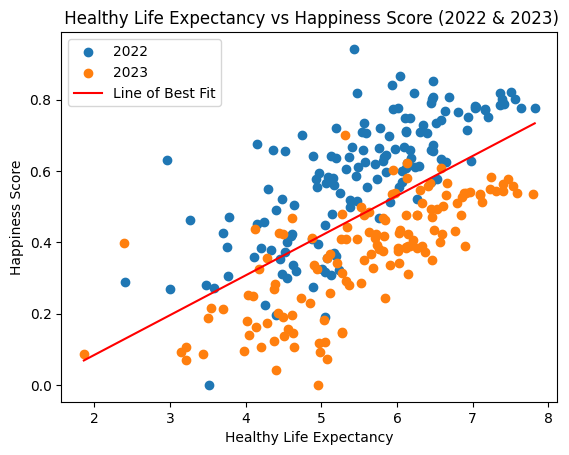

In [26]:
# Put your code here
import matplotlib.pyplot as plt
plt.scatter(happiness2022['happiness_score'], happiness2022['healthy_life_expectancy'], label='2022')

plt.scatter(happiness2023['happiness_score'], happiness2023['healthy_life_expectancy'], label='2023')
score2223 = np.concatenate([happiness2022['happiness_score'], happiness2023['happiness_score']])
expectancies = np.concatenate([happiness2022['healthy_life_expectancy'], happiness2023['healthy_life_expectancy']])

reg = LinearRegression().fit(score2223.reshape(-1, 1), expectancies)
slope = reg.coef_[0]
intercept = reg.intercept_

plt.plot(all_scores, slope * score2223 + intercept, color='red', label='Line of Best Fit')


plt.ylabel('Happiness Score')
plt.xlabel('Healthy Life Expectancy')
plt.title(' Healthy Life Expectancy vs Happiness Score (2022 & 2023)')
plt.legend()
plt.show()

&#9989;  **Question 3.4 (2 points)**: In which year are the happiness score predictions generally better?

<font size=+3>&#9998;</font> happiness score is generally better at 2022.

**&#9989; Do this:** **Question 3.5 (4 points)**: Use `plot_regress_exog` to investigate the distribution of residuals in your model fits. Make sure to create a large enough figure so that everything is easily visible. Make separate plots for 2022 and 2023.

In [56]:
print(model_2022.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7fa5228ae050>>


<Figure size 800x600 with 0 Axes>

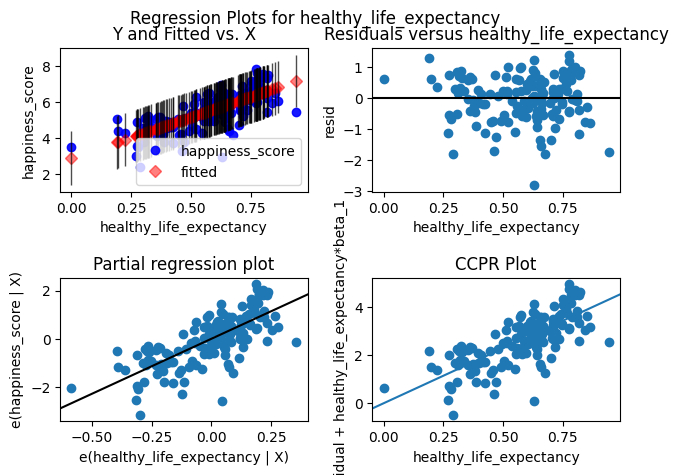

In [57]:
# Put code here.
import statsmodels.formula.api as smf
plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog(model_2022, 'healthy_life_expectancy')# happiness 2022
plt.show()

<Figure size 800x600 with 0 Axes>

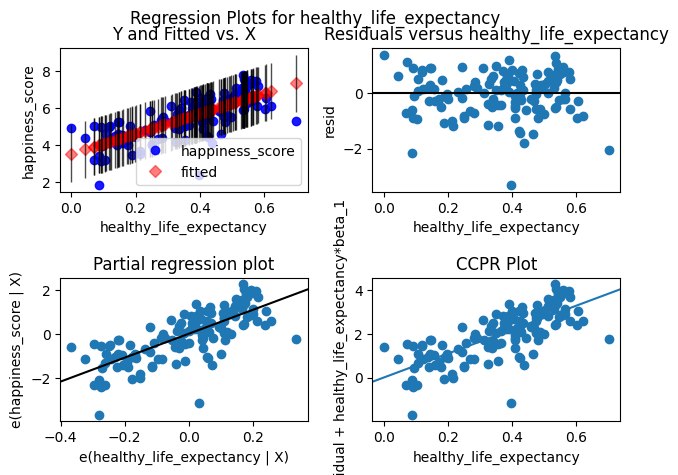

In [58]:
plt.figure(figsize=(8, 6))
#happiness 2023
sm.graphics.plot_regress_exog(model_2023, 'healthy_life_expectancy')
plt.show()

&#9989;  **Question 3.6 (6 points)**: Lets try doing the model fitting again for 2022 and 2023 but only using countries in the `region` column labeled `Western Europe`. Using the `OLS` method in `statsmodels`, perform linear regression to predict `happiness score` based on `healthy_life_expectancy` using only countries in `Western Europe` `region`. Make sure to give the objects and variables different names for this part than the previous part. How do the results compare to Question 3.1? Discuss or compare briefly the observations. You may look at the R-squared values, etc.

In [74]:
# Put your code here

western_europe_happ22 = happiness2022[happiness2022['region'] == 'Western Europe']

X = western_europe_happ22[['healthy_life_expectancy']]
y = western_europe_happ22['happiness_score']

X = sm.add_constant(X)

model_hap22 = sm.OLS(y,X).fit()

print('happiness in Western Europe region 2022',model_hap22.summary())

happiness in Western Europe region 2022                             OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.8010
Date:                Wed, 27 Mar 2024   Prob (F-statistic):              0.382
Time:                        12:07:49   Log-Likelihood:                -19.366
No. Observations:                  21   AIC:                             42.73
Df Residuals:                      19   BIC:                             44.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [75]:
western_europe_happ23 = happiness2023[happiness2023['region'] == 'Western Europe']

X = western_europe_happ23[['healthy_life_expectancy']]
y = western_europe_happ23['happiness_score']

X = sm.add_constant(X)

model_hap23 = sm.OLS(y,X).fit()

print('happiness in Western Europe region 2023 ',model_hap23.summary())

happiness in Western Europe region 2023                              OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.1060
Date:                Wed, 27 Mar 2024   Prob (F-statistic):              0.748
Time:                        12:07:49   Log-Likelihood:                -16.124
No. Observations:                  20   AIC:                             36.25
Df Residuals:                      18   BIC:                             38.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<font size=+3>&#9998;</font> 

The r-square for the 2022 happiness score is 0.040, and the r-squared for 2023 is 0.006 in Western Europe, which means it is a very weak predication for happiness in those 2 years. I looked at the regression plot for Model_hap22 and Model_hap23, and it is low that is due to other factors that play a role in happiness score, not just healthy life expectancy making it a weak predicaiton for the Western Europe region 2023 and 2022 year.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

# Part 4: Multiple Regression (16 points)

In this part, we'll use multiple features to do predictions.

&#9989;  **Question 4.1 (5 points)**: Using the `OLS` method in `statsmodels`, perform a multivariable linear regression to predict the `happiness_score` based on `gdp_per_capita`, `healthy_life_expectancy`, `freedom_to_make_life_choices`, and `generosity`. Also, use the `add_constant()` method in `statsmodels` to ensure the model includes a constant term as well. Fit models to both the 2022 and 2023 data and display summaries of both results.

In [89]:
# Put your code here
plt.figure(figsize=(15, 6))
newx_2022 = happiness2022[['healthy_life_expectancy','gdp_per_capita','freedom_to_make_life_choices','generosity']]
newy = happiness2022['happiness_score']  

x_2022 = sm.add_constant(newx_2022)

gdp_health_fredomchoice_generosity22 = sm.OLS(newy, x_2022).fit()
print(gdp_health_fredomchoice_generosity22.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     89.58
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           9.94e-38
Time:                        12:34:22   Log-Likelihood:                -126.52
No. Observations:                 146   AIC:                             263.0
Df Residuals:                     141   BIC:                             277.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<Figure size 1500x600 with 0 Axes>

In [90]:
plt.figure(figsize=(15, 6))
newx_2023 = happiness2023[['healthy_life_expectancy','gdp_per_capita','freedom_to_make_life_choices','generosity']]
newy = happiness2023['happiness_score']  

x_2023 = sm.add_constant(newx_2023)

gdp_health_fredomchoice_generosity23 = sm.OLS(newy, x_2023).fit()
print(gdp_health_fredomchoice_generosity23.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.19e-39
Time:                        12:42:41   Log-Likelihood:                -113.50
No. Observations:                 136   AIC:                             237.0
Df Residuals:                     131   BIC:                             251.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<Figure size 1500x600 with 0 Axes>

&#9989;  **Question 4.2 (4 points)**: Answer the following questions: 

1. Compared to Question 3.1, are the fits better in Question 4.1? Answer based on e.g., R-squared and Adjusted R-squared values.

2. For each of the features for the year 2023, specify if it is statistically significant or not. Use a p-value threshold of 0.05.

<font size=+3>&#9998;</font> Put your answers here:
Question 3.1 has 1 Independent variable which is healthy_life_expectancy.
4.1has 4 Independent variable which is healthy_life_expectancy,gdp_per_capita,freedom_to_make_life_choices  and generosity  

Comparing r-squared in 2022 with healthy_life_expectancy has 0.548 and  gdp_health_fredomchoice_generosity22 0.718 which means that gdp_health_fredomchoice_generosity22 is better since it has more Independent variables that would be caus reasons for higher happiness scores not just healthy_life_expectancy. 
We can say the same thing to gdp_health_fredomchoice_generosity23 compared to model_2023 the r-squared is higher so it is a better fit which means that there are more independent variables that play a role in happiness score in the country not just healthy_life_expectancy.


The closer the Adjusted R-squared values to 1 the better fit it and looking at linear regression model_2022 is good since it is 0.545 but gdp_health_fredomchoice_generosity22 is a better fit since it is 0.710. 
The linear regression model_2023 is good since it is 0.554 but gdp_health_fredomchoice_generosity22 is a better fit since it is 0.753.

2. gdp_health_fredomchoice_generosity23 is below 0.05 in const,healthy_life_expectancy,gdp_per_capita and freedom_to_make_life_choices are significant.
3. model 2023 const const,healthy_life_expectance is significant.


&#9989;  **Question 4.3 (2 points)**: Perform the multivariable linear regression for 2023, but this time with only the **most significant features** (p-values less than 0.05). Display the summary of these results.

In [112]:
# Put your code here
mosx_2023 = happiness2023[['healthy_life_expectancy','gdp_per_capita','freedom_to_make_life_choices']]
mosy = happiness2023['happiness_score']  

most_significant = sm.add_constant(mosx_2023)

most_significant2023 = sm.OLS(mosy, most_significant)
results=most_significant2023.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     134.6
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           5.61e-40
Time:                        17:20:32   Log-Likelihood:                -115.37
No. Observations:                 136   AIC:                             238.7
Df Residuals:                     132   BIC:                             250.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

&#9989;  **Question 4.4 (2 points)**: How much better/worse is the reduced model compared to the original model? What are its advantages? Briefly discuss the answer.

<font size=+3>&#9998;</font> 

 It went from 0.760 to 0.754 which means that generosity did not have a huge difference in how good the model is just a little down by 0.006. Also, the mode is still significant it went down from 0.753 to 0.748 small change. The disadvantage could be overfitting the data with too many independent variables but it's to our advantage to know that it does not have a huge effect on the model.

&#9989;  **Question 4.5 (3 points)**: Create three `.graphics.plot_regress_exog` figures, one for each of the features (columns of original dataframe) in your reduced model. Pay attention to the top two plots: the fitted values figure and the residual plot. 

<Figure size 1000x600 with 0 Axes>

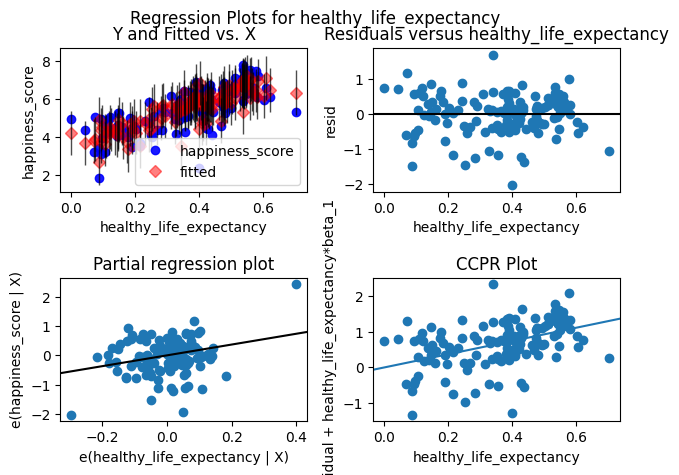

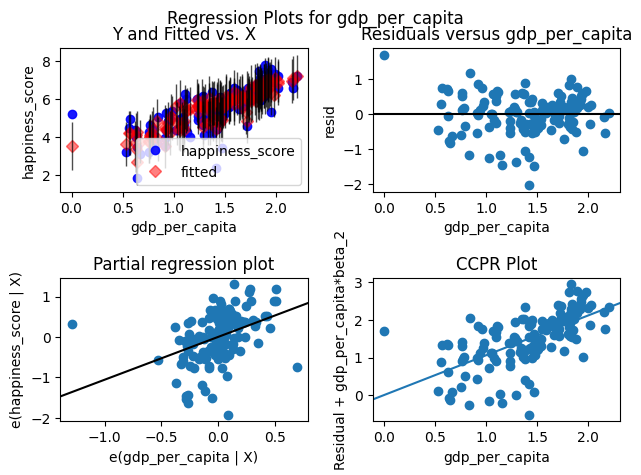

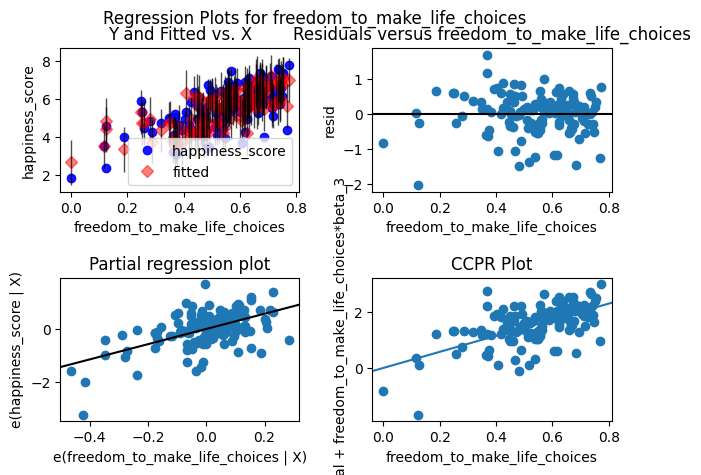

In [114]:
# Put your code here.
plt.figure(figsize=(10, 6))
sm.graphics.plot_regress_exog(results,'healthy_life_expectancy')# happiness 2022
sm.graphics.plot_regress_exog(results,'gdp_per_capita')
sm.graphics.plot_regress_exog(results,'freedom_to_make_life_choices')
plt.show()


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---

# Part 5: Logistic Regression (17 points)

In this part, we'd like to use logistic regression to classify whether a person has diabetes or not. Logistic regression (as we've learned so far in class) does binary classification. 



&#9989;  **Question 5.1 (2 points)**: We will work with data that is available at https://www.kaggle.com/datasets/aemyjutt/diabetesdataanslysis?select=diabetes.csv. 

**You'll need to download the following file**:

`https://raw.githubusercontent.com/ravisha3/CMSE202S24Homework3/main/diabetes.csv`

**Do This**: In the cell below, type the code for downloading the data from inside your notebook and also code for loading the data into a pandas dataframe.

In [34]:
# Put your code here
diabetes_detector= pd.read_csv('diabetes.csv')
diabetes_detector

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


&#9989;  **Question 5.2 (3 points)**:

Create a `Pandas` `Series` called `labels` which has data from the `Outcome` column of the DataFrame. Also, create a `Pandas` `DataFrame` called `features` which consists of just the columns `Glucose`, `BloodPressure`, `BMI`, and `Age`. Display the labels and features to make sure you did this correctly.

In [38]:
# Put your code here.
import pandas as pd

label=pd.Series(diabetes_detector['Outcome'])

features = pd.DataFrame(data=diabetes_detector, columns=["Glucose",
    "BloodPressure",
    "BMI",
    "Age"])
label
features

,Glucose,BloodPressure,BMI,Age
0,148,72,33.6,50
1,85,66,26.6,31
2,183,64,23.3,32
3,89,66,28.1,21
4,137,40,43.1,33
...,...,...,...,...
763,101,76,32.9,63
764,122,70,36.8,27
765,121,72,26.2,30
766,126,60,30.1,47


&#9989;  **Question 5.3 (4 points)**: Split your data into a training and testing set with a training set representing 80% of your data. For reproducibility, set the `random_state` argument to `0`. Print the shapes of the training features, the testing features, the training labels, and the testing labels to show you have the right number of entries in each of the four variables.

In [145]:
# Put your code here
from sklearn.model_selection import train_test_split
#train, test = train_test_split(diabetes_detector, )
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.2, random_state=0)

print("Training Features", x_train.shape)
print("Testing Features ", x_test.shape)
print("Training Labels ", y_train.shape)
print("Testing Labels ", y_test.shape)

Training Features (614, 4)
Testing Features  (154, 4)
Training Labels  (614,)
Testing Labels  (154,)


&#9989;  **Question 5.4 (4 points)**: Now, train a logistic regression model using your training features and training labels. **Display the summary**.

In [146]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
logistic_reggression=LogisticRegression()
logistic_reggression.fit(x_train, y_train)

logit_model = sm.Logit(y_train, sm.add_constant(x_train))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.496121
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      609
Method:                           MLE   Df Model:                            4
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.2407
Time:                        18:31:07   Log-Likelihood:                -304.62
converged:                       True   LL-Null:                       -401.18
Covariance Type:            nonrobust   LLR p-value:                 1.135e-40
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.8207      0.749    -10.440      0.000      -9.289      -6.352
Glucose           0.

&#9989;  **Question 5.5 (4 points)**: Finally, test your logistic regression model using your testing features and testing labels. Display the fraction of testing data points that were correctly predicted. 

In [147]:
# Put your code here
logistic_reggression=LogisticRegression()
logistic_reggression.fit(x_test, y_test)

logit_model = sm.Logit(y_test, sm.add_constant(x_test))
resulttest = logit_model.fit()
print(resulttest.summary())

Optimization terminated successfully.
         Current function value: 0.450716
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  154
Model:                          Logit   Df Residuals:                      149
Method:                           MLE   Df Model:                            4
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.2674
Time:                        18:33:13   Log-Likelihood:                -69.410
converged:                       True   LL-Null:                       -94.741
Covariance Type:            nonrobust   LLR p-value:                 2.627e-10
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.5476      1.633     -5.234      0.000     -11.748      -5.347
Glucose           0.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---

## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw03_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

git checkout main switch to main branch

git pull origin main grab latest updates from main branch

git merge master merge master branch to your main branch

git push origin main push your changes to main

---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [150]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/Z8B1R2tasz" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University